# Impelementing KNN

In [64]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
class Minkowski:
    def __init__(self, p=0):
        self.p = p

    def distance(self, A, B):
        return np.sum(np.abs(A-B) ** self.p, axis=1)**(1/ self.p)

In [ ]:
class Cosine:
	def distance(self, A, B):
		# The distance can then be calculated as :
		# 		1 - Cosine similarity
		# Cosine similarity is given by:
		# 		(A dot B)/(||A|| * ||d||)
		return 1 - np.dot(A, B)/(np.norm(A) * np.norm(B))

In [52]:
class KNN:
    def __init__(self, k=2, distance="euclidean", p=0):
        self.k = k
        self.p = p
        self.set_distance_measure(distance)

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, data):
        predictions = []
        for d in data:
            # Compute distances from this data point to every point in the training dataset
            distances = self.measure.distance(self.X_train, d)
            # Find the k nearest neighbors (and their labels)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]

            # Majority vote for the prediction
            unique, counts = np.unique(k_nearest_labels, return_counts=True)
            majority_vote = unique[np.argmax(counts)]
            predictions.append(majority_vote)

        return np.array(predictions)

    def save(self, name="knn.pk"):
        pass

    @staticmethod
    def load(path):
        pass
    def set_distance_measure(self, measure_name):
        if measure_name == "euclidean":
            self.measure = Minkowski(2)
        elif measure_name == "manhattan":
            self.measure = Minkowski(1)
        elif measure_name == "minkowski":
            self.measure = Minkowski(self.p)
        elif measure_name == "cosine":
            self.measure = Cosine()
        else:
            # Set default measure to euclidean
            self.measure = Minkowski(2)


# Let's try it out

In [53]:
df = sns.load_dataset("iris")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

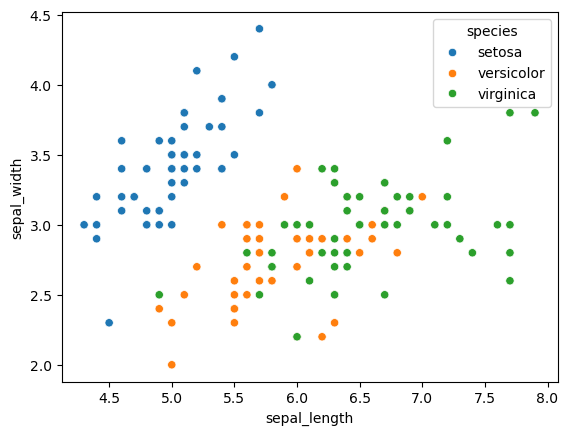

In [67]:
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'], hue=df['species'])

<Axes: xlabel='petal_length', ylabel='petal_width'>

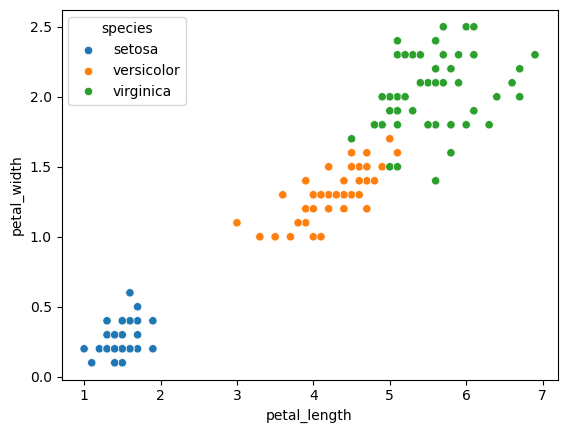

In [68]:
sns.scatterplot(x=df['petal_length'],y=df['petal_width'], hue=df['species'])

In [55]:
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["species"]

In [56]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X.to_numpy(), y.to_numpy(), test_size=0.33, random_state=42)
X_train.shape

(100, 4)

In [70]:
model = KNN(k=3)
model.fit(X_train, y_train)

In [71]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


0.98